In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [11]:
data = np.load('data_fit.npz')
x = data['x']
y = data['y']
x[:10]

array([-5.71571257, -3.68644957, -3.36362129, -3.3315331 , -3.26494852,
       -3.21446727, -3.16611735, -2.97833715, -2.71649451, -2.53023862])

In [20]:
def f(x: np.ndarray, coefs: np.ndarray) -> np.ndarray:
    a, b, c = coefs
    return a * x**2 + b * x + c

### 1. Sum of the errors squared

#### 1.1 `numpy.linalg.lstsq`

`linalg.lstsq(A, y)` computes the vector z that approximately solves the equation A @ z = y.

In [17]:
A = np.array([x**2, x, np.ones(len(x))]).transpose()
z, residuals, rank, singular_values = np.linalg.lstsq(A, y, rcond=None)
print(f'{z=}')

z=array([1.11782318, 0.92097453, 7.21154154])


#### 1.2 `cvxpy`

In [32]:
def squared_cvxpy():
    coefs = cvxpy.Variable(3)
    loss = cvxpy.sum((y - A @ coefs)**2)
    objective = cvxpy.Minimize(loss)
    problem = cvxpy.Problem(objective, None)
    return problem.solve(), coefs.value

solution_sq, coefs_sq = squared_cvxpy()
print(coefs_sq)

[1.11782318 0.92097453 7.21154154]


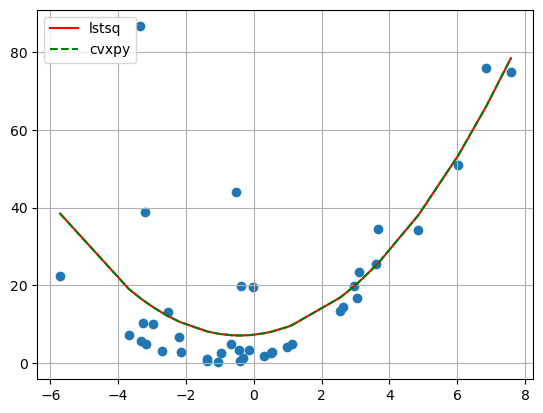

In [33]:
plt.scatter(x, y)
plt.plot(x, f(x, z), color='red', label='lstsq')
plt.plot(x, f(x, coefs_sq), color='green', linestyle='--', label='cvxpy')
plt.grid(True)
plt.legend()
plt.show()

The results are, indeed, the same.

### 2. Sum of absolute values

$$ L(a, b, c) = \sum_i \left| y_i - f(x | a, b, c) \right| $$

In [34]:
def absolute_cvxpy():
    coefs = cvxpy.Variable(3)
    loss = cvxpy.sum(cvxpy.abs(y - A @ coefs))
    objective = cvxpy.Minimize(loss)
    problem = cvxpy.Problem(objective, None)
    return problem.solve(), coefs.value

solution_abs, coefs_abs = absolute_cvxpy()
print(coefs_abs)

[0.99559652 2.11117664 1.95468203]


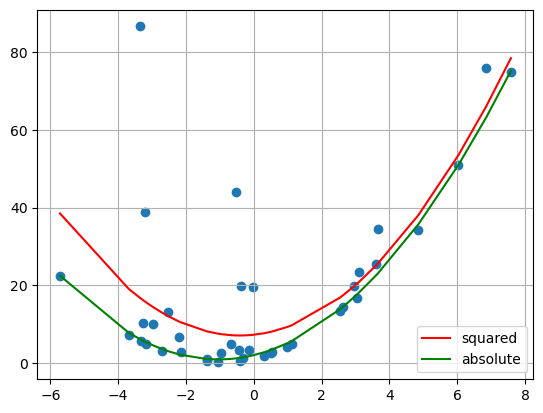

In [35]:
plt.scatter(x, y)
plt.plot(x, f(x, coefs_sq), color='red', label='squared')
plt.plot(x, f(x, coefs_abs), color='green', linestyle='-', label='absolute')
plt.grid(True)
plt.legend()
plt.show()

Such discrepancy is likely due to how the two objective functions react to outliers. In case of squared errors, the growth is, well, square,
so the farther an outlier is from the main cluster, the more it influences the outcome. When we add up absolute values, outliers are
far less significant due to linear growth.